In [1]:
#Import Blockbusters data set

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
bl = pd.read_csv("doe_blockbusters.csv")

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
0,2019,1,8.5,PG-13,Avengers: Endgame,"356,000,000",181,Walt Disney,"2,797,800,564","858,373,000",Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,"260,000,000",118,Walt Disney,"1,656,943,394","543,638,043",Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,"150,000,000",103,Walt Disney,"1,420,560,456","470,089,732",Animation,Adventure,Comedy
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,"160,000,000",129,Sony Pictures,"1,131,927,996","390,532,085",Action,Adventure,Sci-Fi
4,2019,5,6.9,PG-13,Captain Marvel,"175,000,000",123,Walt Disney,"1,128,274,794","426,829,839",Action,Adventure,Sci-Fi
5,2019,6,7.9,G,Toy Story 4,"200,000,000",100,Walt Disney,"1,073,394,593","434,038,008",Animation,Adventure,Comedy
6,2019,7,8.6,R,Joker,"55,000,000",122,Warner Bros.,"1,071,030,470","334,830,470",Crime,Drama,Thriller
7,2019,8,7.0,PG,Aladdin,"183,000,000",128,Walt Disney,"1,050,693,953","355,559,216",Adventure,Family,Fantasy
8,2019,9,6.9,PG-13,Star Wars: Episode IX - The Rise of Skywalker,"200,000,000",142,Walt Disney,"1,048,859,152","503,458,989",Action,Adventure,Fantasy
9,2019,10,6.5,PG-13,Fast & Furious Presents: Hobbs & Shaw,"200,000,000",137,Universal Pictures,"758,910,100","173,810,100",Action,Adventure,NaN


In [11]:
bl['mpaa_rating'].value_counts()

PG-13    178
PG       133
R         95
G         23
Name: mpaa_rating, dtype: int64

In [3]:
bl['domestic_gross'] = bl['domestic_gross'].str.replace(',', '').astype(float)
bl['worldwide_gross'] = bl['worldwide_gross'].str.replace(',', '').astype(float)
bl['film_budget'] = bl['film_budget'].str.replace(',', '').astype(float)

In [4]:
bl = bl[bl['release_year'] >= 2000]

In [5]:
bl_totals = bl.groupby(['release_year','domestic_distributor']).sum()
bl_totals

rank_in_year  imdb_rating   film_budget  \
release_year domestic_distributor                                             
2000         DreamWorks                       12         15.1  2.030000e+08   
             Paramount Pictures                5         12.5  1.950000e+08   
             Twentieth Century Fox            12         15.2  1.650000e+08   
             Universal Pictures               13         13.1  1.780000e+08   
             Walt Disney                       5          6.5  1.275000e+08   
...                                          ...          ...           ...   
2018         Warner Bros.                     15         13.6  3.600000e+08   
2019         Sony Pictures                     4          7.6  1.600000e+08   
             Universal Pictures               10          6.5  2.000000e+08   
             Walt Disney                      34         51.4  1.524000e+09   
             Warner Bros.                      7          8.6  5.500000e+07   

                                    length_in_min  worldwide_gross  \
release_year domestic_distributor                                    
2000         DreamWorks                       285     7.520043e+08   
             Paramount Pictures               250     9.204998e+08   
             Twentieth Century Fox            247     7.259717e+08   
             Universal Pictures               212     6.755854e+08   
             Walt Disney                       82     3.498228e+08   
...                                           ...              ...   
2018         Warner Bros.                     277     1.801918e+09   
2019         Sony Pictures                    129     1.131928e+09   
             Universal Pictures               137     7.589101e+08   
             Walt Disney                      895     1.017653e+10   
             Warner Bros.                     122     1.071030e+09   

                                    domestic_gross  
release_year domestic_distributor                   
2000         DreamWorks               3.431698e+08  
             Paramount Pictures       3.982216e+08  
             Twentieth Century Fox    3.909319e+08  
             Universal Pictures       4.262889e+08  
             Walt Disney              1.377481e+08  
...                                            ...  
2018         Warner Bros.             4.946177e+08  
2019         Sony Pictures            3.905321e+08  
             Universal Pictures       1.738101e+08  
             Walt Disney              3.591987e+09  
             Warner Bros.             3.348305e+08  

[116 rows x 6 columns]

In [9]:
bl2 = bl[['release_year', 'domestic_distributor', 'domestic_gross']].groupby(['release_year','domestic_distributor']).sum().unstack(1)

In [6]:
bl.groupby('domestic_distributor').sum().sort_values(by='domestic_gross')

,release_year,rank_in_year,imdb_rating,film_budget,length_in_min,worldwide_gross,domestic_gross
domestic_distributor,,,,,,,
The H Collective,2017,7,6.0,3.010000e+07,123,8.703254e+08,2.721100e+06
IFC Films,2002,9,6.5,5.000000e+06,95,3.687440e+08,2.414382e+08
Metro-Goldwyn-Mayer,4003,16,12.9,2.290000e+08,264,7.836634e+08,3.260344e+08
Icon Productions,2004,5,7.1,3.000000e+07,127,6.114867e+08,3.702746e+08
Summit Entertainment,6030,17,14.6,2.280000e+08,371,2.120525e+09,8.784425e+08
New Line Cinema,6006,4,26.4,2.810000e+08,558,2.961098e+09,1.030181e+09
Lionsgate,10066,35,33.3,6.130000e+08,663,3.802854e+09,1.743863e+09
Paramount Pictures,26120,69,89.9,2.045000e+09,1762,8.996661e+09,3.125119e+09
DreamWorks,30096,83,104.5,1.978000e+09,1586,9.336941e+09,3.684001e+09


In [10]:
bl2 = bl2.fillna(0)
bl2[('domestic_gross', 'Other')] = bl2[('domestic_gross', 'IFC Films')]+bl2[('domestic_gross', 'The H Collective')] + bl2[('domestic_gross', 'Metro-Goldwyn-Mayer')] + bl2[('domestic_gross', 'Icon Productions')] + bl2[('domestic_gross', 'Summit Entertainment')] + bl2[('domestic_gross', 'New Line Cinema')] + bl2[('domestic_gross', 'Lionsgate')]

In [11]:
bl2 = bl2.drop(columns=('domestic_gross', 'IFC Films'))


In [12]:
bl2 = bl2.drop(columns=('domestic_gross', 'The H Collective'))
bl2 = bl2.drop(columns=('domestic_gross', 'Lionsgate'))
bl2 = bl2.drop(columns=('domestic_gross', 'New Line Cinema'))
bl2 = bl2.drop(columns=('domestic_gross', 'Summit Entertainment'))
bl2 = bl2.drop(columns=('domestic_gross', 'Icon Productions'))
bl2 = bl2.drop(columns=('domestic_gross', 'Metro-Goldwyn-Mayer'))

In [15]:
bl2.columns

MultiIndex([('domestic_gross',            'DreamWorks'),
            ('domestic_gross',    'Paramount Pictures'),
            ('domestic_gross',         'Sony Pictures'),
            ('domestic_gross', 'Twentieth Century Fox'),
            ('domestic_gross',    'Universal Pictures'),
            ('domestic_gross',          'Walt Disney '),
            ('domestic_gross',          'Warner Bros.'),
            ('domestic_gross',                 'Other')],
           names=[None, 'domestic_distributor'])

In [16]:
#bl2
new_cols = [('domestic_gross', 'Walt Disney '),('domestic_gross', 'Twentieth Century Fox'),('domestic_gross', 'Sony Pictures'),('domestic_gross', 'Warner Bros.'),('domestic_gross', 'Universal Pictures'),('domestic_gross', 'Paramount Pictures'), ('domestic_gross', 'DreamWorks'),('domestic_gross', 'Other')]


bl3 = bl2.reindex(columns=new_cols)

bl3


domestic_gross                                      \
domestic_distributor   Walt Disney  Twentieth Century Fox Sony Pictures   
release_year                                                              
2000                   1.377481e+08           390931860.0           0.0   
2001                   4.544158e+08           180011740.0           0.0   
2002                   2.279666e+08           610651583.0   594125178.0   
2003                   6.451289e+08           214949694.0   138608444.0   
2004                   2.614411e+08           186740799.0   373585825.0   
2005                   2.917110e+08           566606856.0   179495555.0   
2006                   6.673988e+08           680556351.0   384982098.0   
2007                   7.358302e+08           183135014.0   336530303.0   
2008                   3.654297e+08                   0.0   396314701.0   
2009                   2.930042e+08           946339844.0   299488013.0   
2010                   9.500179e+08                   0.0           0.0   
2011                   4.325242e+08                   0.0   142614158.0   
2012                   6.233579e+08           161321843.0   745411794.0   
2013                   1.284607e+09                   0.0           0.0   
2014                   8.343536e+08           442467123.0   202853933.0   
2015                   1.752130e+09                   0.0   200074609.0   
2016                   2.364469e+09           363070709.0           0.0   
2017                   1.829067e+09                   0.0   738716620.0   
2018                   1.987457e+09           534919468.0   213515506.0   
2019                   3.591987e+09                   0.0   390532085.0   

                                                                         \
domestic_distributor Warner Bros. Universal Pictures Paramount Pictures   
release_year                                                              
2000                  182618434.0       4.262889e+08        398221596.0   
2001                  500992700.0       3.831917e+08                0.0   
2002                  261988482.0       0.000000e+00                0.0   
2003                  682388784.0       2.428293e+08                0.0   
2004                  508463605.0       2.792612e+08                0.0   
2005                  701815886.0       2.180800e+08        234280354.0   
2006                  398081509.0       0.000000e+00        134029801.0   
2007                  759012687.0       0.000000e+00                0.0   
2008                  533345358.0       1.441301e+08        635705245.0   
2009                  788310379.0       0.000000e+00                0.0   
2010                  588559500.0       2.515140e+08        312433331.0   
2011                  635475524.0       2.098377e+08        561788446.0   
2012                  751142667.0       0.000000e+00                0.0   
2013                  823505078.0       6.067452e+08                0.0   
2014                  255119788.0       0.000000e+00        433459093.0   
2015                  330360194.0       1.341323e+09        195042377.0   
2016                  559137629.0       3.683843e+08                0.0   
2017                  412563408.0       4.906327e+08                0.0   
2018                  494617708.0       4.177198e+08        220159104.0   
2019                  334830470.0       1.738101e+08                0.0   

                                                
domestic_distributor   DreamWorks        Other  
release_year                                    
2000                  343169778.0          0.0  
2001                  267665011.0  478456382.0  
2002                          0.0  742170228.0  
2003                          0.0  377027325.0  
2004                  602088155.0  370274604.0  
2005                  193595521.0          0.0  
2006                          0.0          0.0  
2007                  641966137.0          0.0  
2008                  39544554

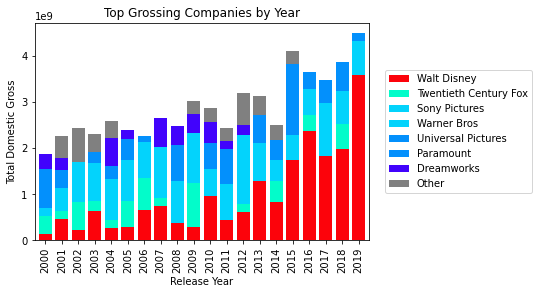

In [24]:
# color=('#Ff0000','#Ff7000','#Feff00','#9ff000','#5dff00','#00ffaf','#00edff','#00a5ff','#001fff','#7000ff','#E500ff','#Ff0093','#Ff003a','black')

bl3.plot(kind='bar',stacked=True,width=0.8,color=('#fc030b','#03fcca','#03d3fc','#03d3fc','#0390fc','#0390fc','#4103fc','grey'))
plt.legend(['Walt Disney','Twentieth Century Fox','Sony Pictures','Warner Bros','Universal Pictures','Paramount','Dreamworks','Other'], bbox_to_anchor = (1.5, 0.5), loc='center right')
plt.title("Top Grossing Companies by Year")
plt.xlabel("Release Year")
plt.ylabel("Total Domestic Gross")
plt.savefig('pythonprjfigs/companiesbyyear.png', bbox_inches='tight')
#plt.legend(['DreamWorks','IFC Films','Icon Productions','Lionsgate','MGM','New Line Cinema','Paramount Pictures','Sony Pictures','Summit Entertainment','The H Collective','Twentieth Century Fox','Universal Pictures','Walt Disney','Warner Bros'])

In [27]:
bl['gross_ratio'] = bl['domestic_gross'] / bl['film_budget']

In [21]:
bl['gross_ratio']

0       2.411160
1       2.090916
2       3.133932
3       2.440826
4       2.439028
         ...    
425     5.260707
426     3.345620
427    19.851068
428     9.562856
429     6.524059
Name: gross_ratio, Length: 430, dtype: float64

In [122]:
bl

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,gross_ratio
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000.0,181,Walt Disney,2.797801e+09,858373000.0,Action,Adventure,Drama,2.411160
1,2019,2,7.0,PG,The Lion King,260000000.0,118,Walt Disney,1.656943e+09,543638043.0,Animation,Adventure,Drama,2.090916
2,2019,3,7.2,PG,Frozen II,150000000.0,103,Walt Disney,1.420560e+09,470089732.0,Animation,Adventure,Comedy,3.133932
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,160000000.0,129,Sony Pictures,1.131928e+09,390532085.0,Action,Adventure,Sci-Fi,2.440826
4,2019,5,6.9,PG-13,Captain Marvel,175000000.0,123,Walt Disney,1.128275e+09,426829839.0,Action,Adventure,Sci-Fi,2.439028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2000,6,6.1,PG,How the Grinch Stole Christmas,123000000.0,104,Universal Pictures,3.451414e+08,260044825.0,Comedy,Family,Fantasy,2.114186
196,2000,7,7.0,PG-13,Meet the Parents,55000000.0,108,Universal Pictures,3.304440e+08,166244045.0,Comedy,romance,NaN,3.022619
197,2000,8,6.4,PG-13,The Perfect Storm,140000000.0,130,Warner Bros.,3.287184e+08,182618434.0,Action,Adventure,Drama,1.304417
198,2000,9,7.4,PG-13,X-Men,75000000.0,104,Twentieth Century Fox,2.963395e+08,157299718.0,Action,Adventure,Sci-Fi,2.097330


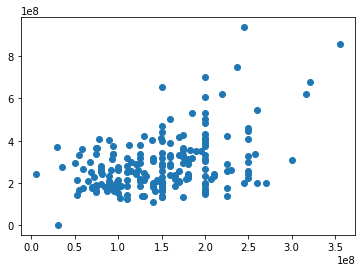

In [126]:
plt.scatter(bl.film_budget,bl.domestic_gross)

In [131]:
bl['domestic_distributor'].unique()

array(['Walt Disney ', 'Sony Pictures', 'Warner Bros.',
       'Universal Pictures', 'Twentieth Century Fox',
       'Paramount Pictures', 'The H Collective', 'Lionsgate',
       'DreamWorks', 'Summit Entertainment', 'Icon Productions',
       'New Line Cinema', 'Metro-Goldwyn-Mayer', 'IFC Films'],
      dtype=object)

In [32]:
bl_dis = bl[bl['domestic_distributor'] == 'Walt Disney ']
bl_uni = bl[bl['domestic_distributor'] == 'Universal Pictures']
bl_wb = bl[bl['domestic_distributor'] == 'Warner Bros.']
bl_sony = bl[bl['domestic_distributor'] == 'Sony Pictures']
bl_twent = bl[bl['domestic_distributor'] == 'Twentieth Century Fox']

/Users/dillonedwards/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='film_budget', ylabel='domestic_gross'>

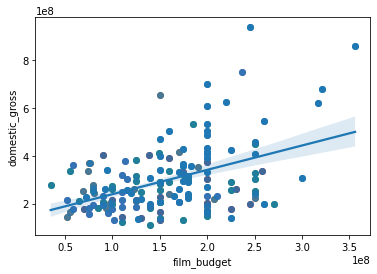

In [33]:
plt.scatter(bl_dis.film_budget,bl_dis.domestic_gross)
plt.scatter(bl_uni.film_budget,bl_uni.domestic_gross)
plt.scatter(bl_wb.film_budget,bl_wb.domestic_gross)
plt.scatter(bl_sony.film_budget,bl_sony.domestic_gross)
plt.scatter(bl_twent.film_budget,bl_twent.domestic_gross)
sns.regplot(bl_sub.film_budget,bl_sub.domestic_gross,ci=80)

/Users/dillonedwards/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


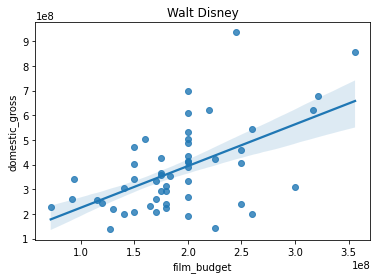

In [37]:
sns.regplot(bl_dis.film_budget,bl_dis.domestic_gross,ci=80).set(title="Walt Disney")
plt.savefig('pythonprjfigs/disneygross.png', bbox_inches='tight')

/Users/dillonedwards/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


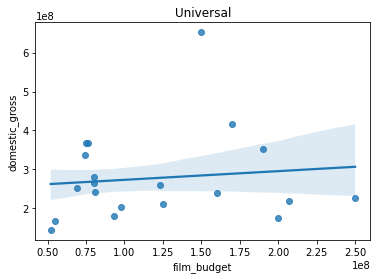

In [38]:
sns.regplot(bl_uni.film_budget,bl_uni.domestic_gross,ci=80).set(title="Universal")
plt.savefig('pythonprjfigs/universalgross.png', bbox_inches='tight')

/Users/dillonedwards/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


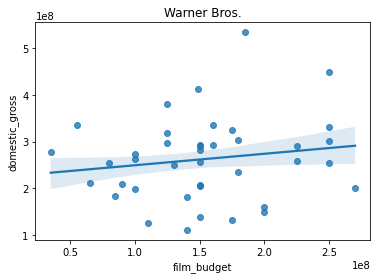

In [39]:
sns.regplot(bl_wb.film_budget,bl_wb.domestic_gross,ci=80).set(title="Warner Bros.")
plt.savefig('pythonprjfigs/wbgross.png', bbox_inches='tight')

/Users/dillonedwards/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


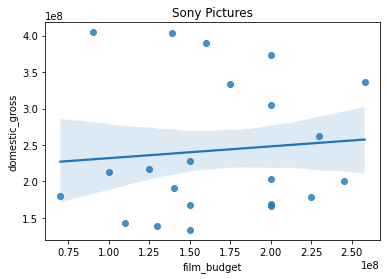

In [40]:
sns.regplot(bl_sony.film_budget,bl_sony.domestic_gross,ci=80).set(title="Sony Pictures")
plt.savefig('pythonprjfigs/sonygross.png', bbox_inches='tight')

/Users/dillonedwards/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


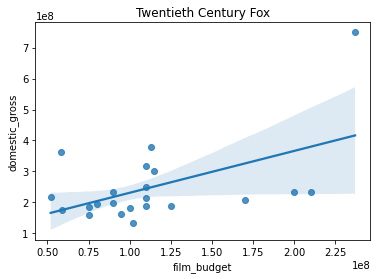

In [41]:
#sns.regplot(bl_dis.film_budget,bl_dis.domestic_gross,ci=80).set(title="Walt Disney")
#sns.regplot(bl_uni.film_budget,bl_uni.domestic_gross,ci=80).set(title="Universal")
#sns.regplot(bl_wb.film_budget,bl_wb.domestic_gross,ci=80).set(title="Warner Bros.")
#sns.regplot(bl_sony.film_budget,bl_sony.domestic_gross,ci=80).set(title="Sony Pictures")
sns.regplot(bl_twent.film_budget,bl_twent.domestic_gross,ci=80).set(title="Twentieth Century Fox")
plt.savefig('pythonprjfigs/twentygross.png', bbox_inches='tight')

/Users/dillonedwards/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='domestic_distributor', ylabel='gross_ratio'>

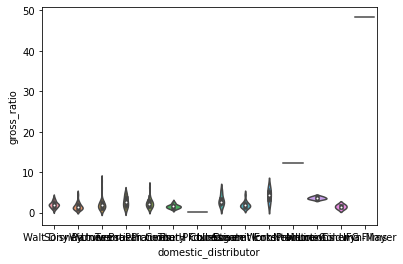

In [137]:
sns.violinplot('domestic_distributor','gross_ratio',data=bl)

In [28]:
# Create subframe
bl_sub = bl[(bl['domestic_distributor'] == "Walt Disney ") | (bl['domestic_distributor'] == "Warner Bros.") | (bl['domestic_distributor'] == "Universal Pictures") | (bl['domestic_distributor'] == "Twentieth Century Fox") | (bl['domestic_distributor'] == "Sony Pictures")]

/Users/dillonedwards/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


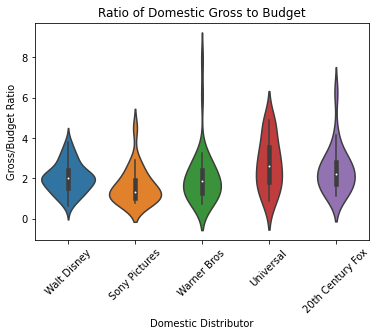

In [31]:
ax = sns.violinplot('domestic_distributor','gross_ratio',data=bl_sub)
ax.set_title("Ratio of Domestic Gross to Budget")
ax.set(xlabel="Domestic Distributor",ylabel="Gross/Budget Ratio")
ax.set_xticklabels(labels=["Walt Disney", "Sony Pictures", "Warner Bros", "Universal", "20th Century Fox"],rotation=45)
plt.savefig('pythonprjfigs/violinplots.png', bbox_inches='tight')


In [170]:
bl_twent.sort_values(by='domestic_gross')

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,gross_ratio
179,2002,10,7.6,PG-13,Minority Report,102000000.0,145,Twentieth Century Fox,3.583729e+08,132072926.0,Action,Crime,Mystery,1.294833
198,2000,9,7.4,PG-13,X-Men,75000000.0,104,Twentieth Century Fox,2.963395e+08,157299718.0,Action,Adventure,Sci-Fi,2.097330
74,2012,5,6.6,PG,Ice Age: Continental Drift,95000000.0,88,Twentieth Century Fox,8.772448e+08,161321843.0,Animation,Adventure,Comedy,1.698125
177,2002,8,7.5,PG,Ice Age,59000000.0,81,Twentieth Century Fox,3.832571e+08,176387405.0,Animation,Adventure,Comedy,2.989617
188,2001,9,5.7,PG-13,Planet of the Apes,100000000.0,119,Twentieth Century Fox,3.622117e+08,180011740.0,Action,Adventure,Sci-Fi,1.800117
127,2007,8,7.3,PG-13,The Simpsons Movie,75000000.0,87,Twentieth Century Fox,5.364143e+08,183135014.0,Animation,Adventure,Comedy,2.441800
146,2005,7,6.5,PG-13,Mr. & Mrs. Smith,110000000.0,120,Twentieth Century Fox,4.872876e+08,186336279.0,Action,Comedy,Crime,1.693966
155,2004,6,6.4,PG-13,The Day After Tomorrow,125000000.0,124,Twentieth Century Fox,5.526396e+08,186740799.0,Action,Adventure,Sci-Fi,1.493926
132,2006,3,6.8,PG,Ice Age: The Meltdown,80000000.0,91,Twentieth Century Fox,6.609988e+08,195330621.0,Animation,Adventure,Comedy,2.441633
102,2009,3,6.9,PG,Ice Age: Dawn of the Dinosaurs,90000000.0,94,Twentieth Century Fox,8.866868e+08,196573705.0,Animation,Adventure,Comedy,2.184152


In [43]:
bl['domestic_worldwide'] = bl['domestic_gross'] / bl['worldwide_gross']

In [44]:
bl

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,gross_ratio,domestic_worldwide
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000.0,181,Walt Disney,2.797801e+09,858373000.0,Action,Adventure,Drama,2.411160,0.306803
1,2019,2,7.0,PG,The Lion King,260000000.0,118,Walt Disney,1.656943e+09,543638043.0,Animation,Adventure,Drama,2.090916,0.328097
2,2019,3,7.2,PG,Frozen II,150000000.0,103,Walt Disney,1.420560e+09,470089732.0,Animation,Adventure,Comedy,3.133932,0.330918
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,160000000.0,129,Sony Pictures,1.131928e+09,390532085.0,Action,Adventure,Sci-Fi,2.440826,0.345015
4,2019,5,6.9,PG-13,Captain Marvel,175000000.0,123,Walt Disney,1.128275e+09,426829839.0,Action,Adventure,Sci-Fi,2.439028,0.378303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2000,6,6.1,PG,How the Grinch Stole Christmas,123000000.0,104,Universal Pictures,3.451414e+08,260044825.0,Comedy,Family,Fantasy,2.114186,0.753444
196,2000,7,7.0,PG-13,Meet the Parents,55000000.0,108,Universal Pictures,3.304440e+08,166244045.0,Comedy,romance,NaN,3.022619,0.503093
197,2000,8,6.4,PG-13,The Perfect Storm,140000000.0,130,Warner Bros.,3.287184e+08,182618434.0,Action,Adventure,Drama,1.304417,0.555547
198,2000,9,7.4,PG-13,X-Men,75000000.0,104,Twentieth Century Fox,2.963395e+08,157299718.0,Action,Adventure,Sci-Fi,2.097330,0.530809


In [48]:
bl_avg = bl.groupby('release_year').mean()

In [49]:
bl_avg['foreign'] = 1 - bl_avg['domestic_worldwide']

In [52]:
bl_avg = bl_avg[['domestic_worldwide','foreign']]
bl_avg

,domestic_worldwide,foreign
release_year,,
2000,0.510436,0.489564
2001,0.448999,0.551001
2002,0.446594,0.553406
2003,0.402098,0.597902
2004,0.419768,0.580232
2005,0.413841,0.586159
2006,0.409220,0.590780
2007,0.390583,0.609417
2008,0.376700,0.623300


In [53]:
bl_avg['release_year'] = bl_avg.index

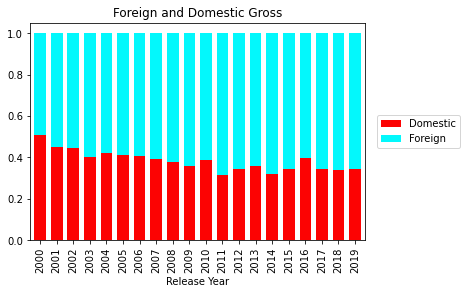

In [62]:
bl_avg.plot.bar(x='release_year',stacked=True,width=0.7,color=('#fc0303','#03f8fc'))
#bl3.plot(kind='bar',stacked=True,width=0.8,color=('#fc030b','#03fcca','#03d3fc','#03d3fc','#0390fc','#0390fc','#4103fc','grey'))
plt.legend(["Domestic","Foreign"], bbox_to_anchor = (1.3, 0.5), loc='center right')
plt.title("Foreign and Domestic Gross")
plt.xlabel("Release Year")
plt.savefig('pythonprjfigs/foreigndomestic.png', bbox_inches='tight')


In [81]:
bl_domestic = bl_sub.groupby(['domestic_distributor']).sum()

In [82]:
bl_domestic['domestic_world'] = bl_domestic['domestic_gross'] / bl_domestic['worldwide_gross']

In [83]:
bl_domestic

,release_year,rank_in_year,imdb_rating,film_budget,length_in_min,worldwide_gross,domestic_gross,gross_ratio,domestic_world
domestic_distributor,,,,,,,,,
Sony Pictures,44216,130,149.1,3.647000e+09,2798,1.590734e+10,5.336849e+09,35.569485,0.335496
Twentieth Century Fox,44159,136,158.1,2.486000e+09,2609,1.540916e+10,5.461703e+09,52.952274,0.354445
Universal Pictures,40201,111,134.0,2.408000e+09,2327,1.614402e+10,5.553748e+09,54.316193,0.344013
Walt Disney,104631,240,385.9,9.947500e+09,6401,5.118857e+10,1.973004e+10,105.440434,0.385438
Warner Bros.,80349,238,293.7,6.139000e+09,5428,2.904099e+10,1.050233e+10,81.762689,0.361638
